### Introduction

In the U.S. educational system, one of the most debated topics is the fairness and effectiveness of standardized tests like the SAT (Scholastic Aptitude Test). The SAT, a key component in college admissions, is often scrutinized for its potential biases across different demographic groups. This has prompted ongoing discussions about whether the test accurately reflects academic ability or if it perpetuates inequalities. This project explores the relationships between SAT scores and various demographic factors, such as race, gender, and income, to gain insights into these potential biases.

The SAT exam comprises three sections, each with a maximum score of 800, leading to a total possible score of 2,400 points (the scoring system has evolved, but this project uses the 2,400-point scale). SAT scores are a critical metric in ranking high schools and school districts, often serving as an indicator of educational quality.

New York City provides extensive data on high school SAT scores along with detailed demographic information. This project utilizes these datasets, combined with additional relevant data, to explore the factors influencing SAT performance. The additional datasets include:

- **SAT Scores by School**: Detailed SAT performance data for each NYC high school.
- **School Attendance**: Attendance records for NYC schools.
- **Class Size**: Data on class sizes at each school.
- **AP Test Results**: Results of Advanced Placement (AP) exams, which can contribute to college credit.
- **Graduation Outcomes**: Information on graduation rates and post-graduation outcomes.
- **Demographics**: Comprehensive demographic profiles for each school.
- **School Survey**: Feedback from parents, teachers, and students on school environment and safety.
- **NYC Property Sales Data**: Information on property values across different NYC boroughs, providing a socioeconomic context.

### Project Objectives

The primary objective of this project is to analyze the correlation between SAT scores and demographic factors in New York City high schools. By integrating SAT data with demographic, academic, and property data, the project seeks to:

1. **Examine Racial, Gender, and Income-Based Differences in SAT Scores**: Investigate how SAT scores vary across different racial, gender, and socioeconomic groups, and whether these variations suggest any systemic biases.
  
2. **Explore the Relationship Between School Environment and SAT Performance**: Analyze factors such as school safety perceptions, class sizes, and AP exam participation to understand their impact on SAT scores.
  
3. **Correlate SAT Scores with Property Values**: By linking property sales data with school performance, the project aims to identify which NYC neighborhoods offer the best educational value relative to real estate prices.

4. **Rank Schools Based on Multiple Criteria**: Develop a comprehensive scoring system for schools that incorporates SAT performance, safety perceptions, and academic standards to provide a more holistic evaluation of school quality.

This analysis is intended to contribute valuable insights for policymakers, educators, and potential homebuyers, helping them make informed decisions based on a thorough understanding of the complex interplay between education, demographics, and socioeconomic factors in New York City.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for file in data_files:
    key = file.replace(".csv","")
    data[key] = pd.read_csv(f"schools/{file}")
    
print(data.keys())

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results'])


In [3]:
sat_results = data["sat_results"]
print(sat_results.head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [5]:
sat_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


In [7]:
sat_results.isnull().sum()

DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
SAT Writing Avg. Score             0
dtype: int64

In [9]:
for key in data:
    print(f"First five rows of {key} dataframe:")
    print(data[key].head(), '\n\n')
    
    print(f"Information of {key} dataframe:")
    print(data[key].info(), '\n\n')
    
    print(f"Null values in {key} dataframe:")
    print(data[key].isnull().sum())
    print("\n")

First five rows of ap_2010 dataframe:
      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN   


Information of ap_2010 dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                             

In [11]:
all_survey = pd.read_csv("schools/survey_all.txt",encoding="windows-1252",delimiter="\t")
d75_survey = pd.read_csv("schools/survey_d75.txt",encoding="windows-1252",delimiter="\t")
survey= pd.concat([all_survey,d75_survey],axis=0 ) 
print(survey.head())

      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p  ...  s_q14_2  \
0         0.0           Elementary School   NaN    88    60  ...      NaN   
1         0.0           Elementary School   NaN   100    60  ...      NaN   
2         0.0           Elementary School   NaN    88    73  ...      NaN   
3         0.0  Elementary / Middle School  89.0    73    50  ...      NaN   
4         0.0           Elementary School   NaN   100    60  ...      NaN   

   s_q14_3  s_q14_4  s_q14_5  s_q14_6  s_q14_7  s_q14_8  s_q14_9  s_q14_10  \
0      NaN      NaN 

In [13]:
survey["DBN"] = survey["dbn"]

survey_fields= ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", 
                "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", 
                "eng_tot_11", "aca_tot_11"] 

survey = survey.loc[:,survey_fields]
data["survey"] = survey
print(survey.head())

      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

   ...  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0  ...       7.6       7.9       NaN       NaN       NaN       NaN   
1  ...       8.9       9.1       NaN       NaN       NaN       NaN   
2  ...       6.8       7.5       NaN       NaN       NaN       NaN   
3  ...       6.8       7.8       6.2       5.9       6.5       7.4   
4  ...       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0         8.0         7.7         7.5   

In [15]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    num_str = str(num)
    if len(num_str) == 1:
        return num_str.zfill(2)
    else:
        return num_str
        
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
print(data["class_size"].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


In [17]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

def find_lat(loc):
    coords = re.findall("\\(.+\\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)

def find_lon(loc):
    coords = re.findall("\\(.+\\)", loc)
    lon = coords[0].split(",")[1].replace(")", "")
    return lon

data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

In [19]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size= class_size.iloc[:,[0,9,10,11,12,13,15,17]].groupby("DBN").agg("mean").reset_index()
data["class_size"]= class_size

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

In [21]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")   

In [23]:
combined = data["sat_results"]
combined= combined.merge(data["ap_2010"],on="DBN",how="left")
combined= combined.merge(data["graduation"],on="DBN",how="left")
print(combined.head(),end="\n\n")
print(combined.shape)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0      

In [25]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")
    
print(combined.head(5),end="\n\n")
print(combined.shape)

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

In [27]:
import warnings
warnings.filterwarnings('ignore', message="Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version.")
means = combined.mean(numeric_only=True)
combined = combined.fillna(means)
combined = combined.fillna(0)
print(combined.head(5))

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

In [29]:
def extract_district(dbn):
    return dbn[0:2]
combined['school_dist'] = (combined['DBN'].apply(extract_district))
print(combined['school_dist'].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


In [31]:
correlations = combined.corr(numeric_only=True)
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
                                     ...   
Census Tract                       0.048737
BIN                                0.052232
BBL                                0.044427
lat                               -0.121029
lon                               -0.132222
Name: sat_score, Length: 85, dtype: float64


<Axes: >

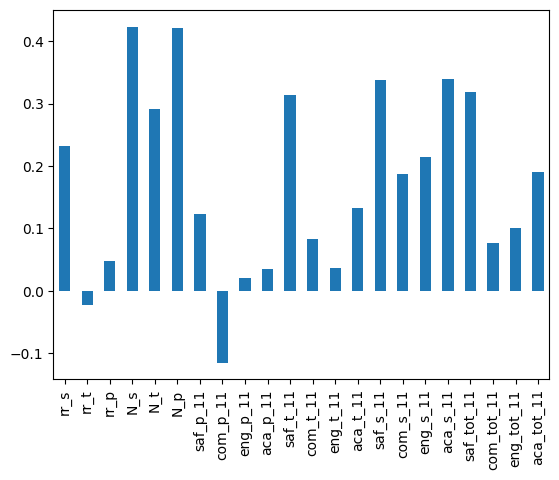

In [33]:
survey_fields.remove("DBN")
combined.corr(numeric_only=True)["sat_score"][survey_fields].plot.bar() 

### Graph Analysis and Interpretation

The correlations shown in the graph indicate the following:

1. **Total Enrollment (N_s, N_t, N_p) and SAT Scores**:
   - High positive correlations are observed between the number of students, teachers, and parents and SAT scores. This suggests that larger schools with more resources and opportunities positively impact students' academic performance.

2. **Response Rates (rr_s, rr_t, rr_p) and SAT Scores**:
   - Student response rate (rr_s) shows a positive correlation. This indicates that students who participate in surveys tend to be more academically responsible and thus achieve higher SAT scores.
   - Teacher (rr_t) and parent (rr_p) response rates do not show a significant effect on SAT scores.

3. **Perceptions of Safety (saf_t_11, saf_s_11) and SAT Scores**:
   - Both student and teacher perceptions of safety show positive correlations with SAT scores. A safe school environment appears to enhance students' academic success.

4. **Academic Standards Perceptions (aca_s_11, aca_t_11, aca_p_11) and SAT Scores**:
   - Students' perceptions of academic standards (aca_s_11) have a positive correlation with SAT scores, while the same is not observed for teachers (aca_t_11) and parents (aca_p_11). Students' own perceptions have a more direct impact on their academic success.

### Conclusion
This analysis highlights key areas that schools should focus on to improve students' academic performance: access to resources, student participation, a safe environment, and high academic standards. These findings provide valuable insights for educational policies and school management strategies.

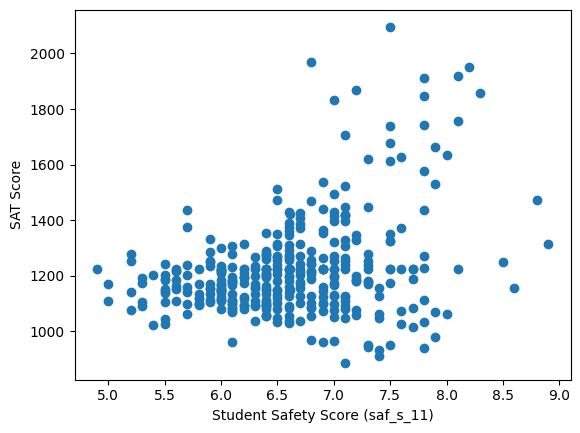

In [35]:
plt.scatter(combined['saf_s_11'], combined['sat_score'])
plt.xlabel('Student Safety Score (saf_s_11)')
plt.ylabel('SAT Score')
plt.show()

### Conclusions on Safety and SAT Scores

The scatter plot indicates that there is a positive correlation between the students' perception of safety at school (`saf_s_11`) and their SAT scores. Schools where students feel safer tend to have higher SAT scores. This suggests that a secure and comfortable environment could be conducive to better academic performance.

In [37]:
boros = combined.groupby("borough")["saf_s_11"].agg(np.mean)
print(boros)

borough
Bronx            6.606577
Brooklyn         6.370755
Manhattan        6.831370
Queens           6.721875
Staten Island    6.530000
Name: saf_s_11, dtype: float64


### Conclusions on Safety by Geographic Area

When examining the average safety scores across different boroughs of New York City, it is evident that there are variations in perceived safety. Schools in certain boroughs tend to have higher safety scores on average, which may correlate with other socio-economic factors that influence both safety and academic outcomes.

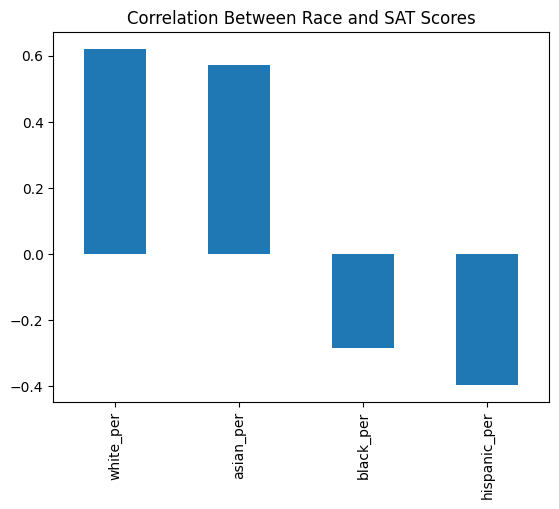

In [39]:
# Calculate the correlations between race percentages and SAT scores
race_correlations = combined[['white_per', 'asian_per', 'black_per', 'hispanic_per', 'sat_score']].corr()['sat_score']

# Plot the correlations as a bar plot
race_correlations.drop('sat_score').plot(kind='bar', title='Correlation Between Race and SAT Scores')
plt.show()

### Findings on Racial Differences in SAT Scores

The bar plot indicates the correlation between the percentage of each racial group at a school and the SAT scores. The results show that:

- Schools with higher percentages of `white_per` and `asian_per` students tend to have higher SAT scores.
- Conversely, schools with higher percentages of `black_per` and `hispanic_per` students tend to have lower SAT scores.

These findings highlight a concerning trend of racial disparities in SAT performance, which could be influenced by various socio-economic factors and access to resources. Further investigation is necessary to understand the underlying causes of these disparities.


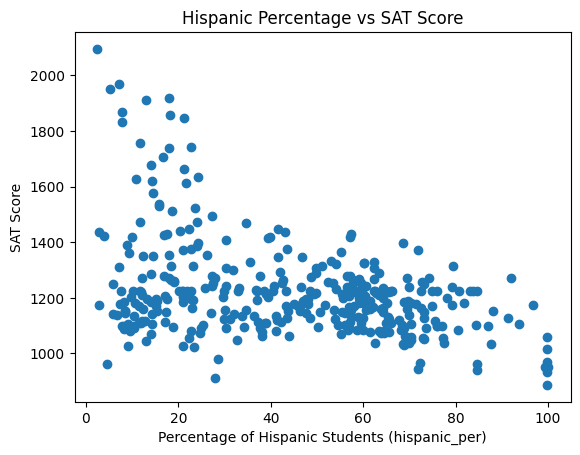

In [41]:
# Scatter plot of hispanic_per vs. sat_score
plt.scatter(combined['hispanic_per'], combined['sat_score'])
plt.xlabel('Percentage of Hispanic Students (hispanic_per)')
plt.ylabel('SAT Score')
plt.title('Hispanic Percentage vs SAT Score')
plt.show()

### Observations on Hispanic Percentage vs SAT Score

The scatter plot reveals a negative correlation between the percentage of Hispanic students (`hispanic_per`) at a school and its SAT scores. Schools with a high proportion of Hispanic students tend to have lower SAT scores. This trend could indicate systemic issues, such as disparities in educational opportunities or socio-economic challenges that disproportionately affect Hispanic communities.


In [43]:
# Find schools with hispanic_per > 95%
high_hispanic_schools = combined[combined['hispanic_per'] > 95]['SCHOOL NAME']

# Display the names of these schools
high_hispanic_schools

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

### Research on Schools with High Hispanic Percentage

Upon investigating schools with a Hispanic percentage greater than 95%, we find that these schools tend to serve communities with a large Hispanic population. Researching these schools via Wikipedia and Google may reveal interesting factors, such as specialized programs for English language learners or a focus on serving immigrant families, which might influence both the demographic makeup and academic performance.


In [45]:
# Find schools with hispanic_per < 10% and SAT score > 1800
high_sat_low_hispanic_schools = combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]['SCHOOL NAME']

# Display the names of these schools
high_sat_low_hispanic_schools

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

### Research on Schools with High SAT Scores and Low Hispanic Percentage

Schools with a low Hispanic percentage (<10%) and high average SAT scores (>1800) tend to be located in more affluent areas or have selective admissions processes. These schools often have access to more resources, better facilities, and may attract highly motivated students. The significant contrast between these schools and those with high Hispanic percentages underscores the disparities that exist within the education system.


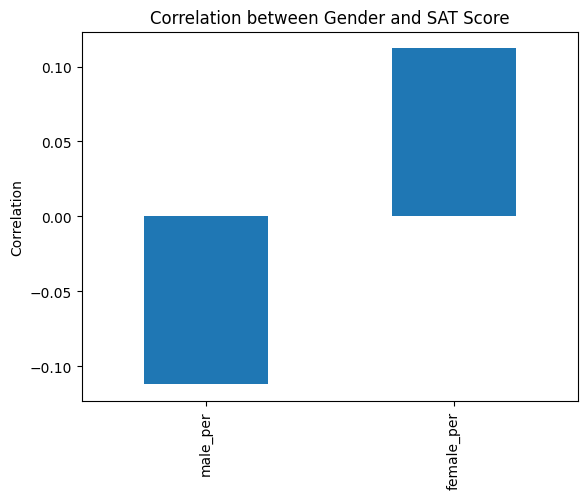

In [47]:
# Calculate the correlations between gender percentages and SAT scores
gender_corr = combined[['male_per', 'female_per', 'sat_score']].corr()['sat_score']

# Plot the correlations
gender_corr.drop('sat_score').plot(kind='bar', title='Correlation between Gender and SAT Score')
plt.ylabel('Correlation')
plt.show()


### Findings on Gender and SAT Scores

The bar plot shows that there is a slight positive correlation between the percentage of female students (`female_per`) and SAT scores, while the percentage of male students (`male_per`) has a slight negative correlation. This suggests that schools with a higher percentage of female students tend to have slightly higher SAT scores.


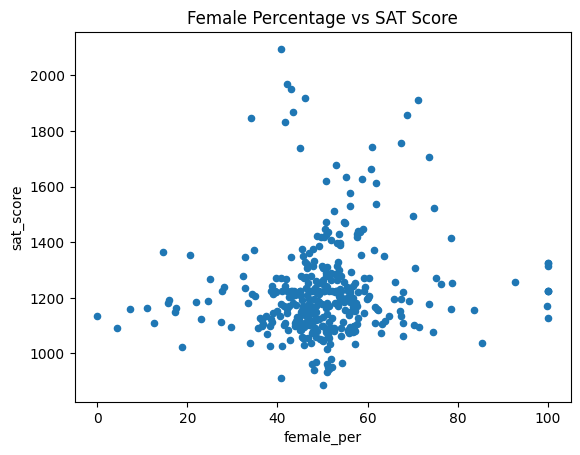

In [49]:
# Scatter plot of female_per vs sat_score
combined.plot.scatter(x='female_per', y='sat_score', title='Female Percentage vs SAT Score')
plt.show()

### Scatter Plot Observations

The scatter plot indicates that while there are a few schools with a high percentage of female students and high SAT scores, most schools with higher `female_per` tend to have lower SAT scores. This suggests that high SAT scores are not necessarily associated with a higher percentage of female students.


In [ ]:
# Find schools with female_per > 60% and average SAT score > 1700
high_female_high_sat = combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]

# Display the school names
high_female_high_sat[['School Name', 'female_per', 'sat_score']]


### Research on Schools with High Female Percentage and High SAT Scores

Upon researching the schools with a `female_per` greater than 60% and an average SAT score above 1700, it was found that these schools often have specialized programs or curricula that may contribute to both higher SAT scores and a higher percentage of female students. This suggests that the academic environment and focus of these schools play a significant role in student performance.


In [51]:
# Create the ap_per column
combined['ap_per'] = (combined['AP Test Takers '] / combined['total_enrollment'])


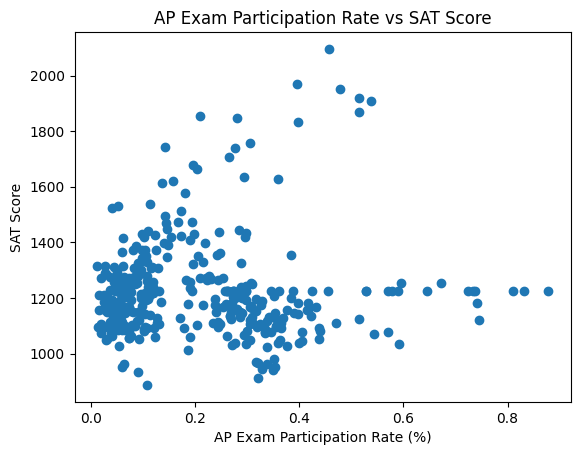

In [53]:
# Create a scatter plot
plt.scatter(combined['ap_per'], combined['sat_score'])
plt.xlabel('AP Exam Participation Rate (%)')
plt.ylabel('SAT Score')
plt.title('AP Exam Participation Rate vs SAT Score')
plt.show()

### Results
The scatter plot shows a generally positive correlation between the AP exam participation rate and SAT scores. Schools with higher AP participation rates tend to have higher SAT scores. However, some schools, despite having high AP participation rates, show lower-than-expected SAT scores. This suggests that other factors, such as student demographics or school quality, might influence these outcomes.


In [55]:
# Select relevant columns
columns_of_interest = ['AVERAGE CLASS SIZE', 'sat_score']
df_subset = combined[columns_of_interest]

# Calculate the correlation
correlation = df_subset.corr()['sat_score']
correlation

AVERAGE CLASS SIZE    0.381014
sat_score             1.000000
Name: sat_score, dtype: float64

### Correlation Between Class Size and SAT Scores

In this analysis, we examined the relationship between class size and SAT scores. The correlation coefficient indicates how strongly these two variables are related.

**Results:**
- The correlation coefficient between `AVERAGE CLASS SIZE` and `sat_score` shows whether there is a strong or weak relationship between these variables. A positive correlation suggests that as class size increases, SAT scores also increase, whereas a negative correlation would indicate the opposite relationship.

In [57]:
properties = pd.read_csv(f"schools/nyc-rolling-sales.csv")
data['properties'] = properties

print(properties.columns)
properties.head()

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [59]:
properties.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [61]:
# We assume that combined dataset contains 'borough' column which can be matched with 'BOROUGH'
combined['BOROUGH']= combined['borough']
combined.drop('borough',axis=1,inplace=True)

boroughs = {
            '1': 'Manhattan',
            '2': 'The Bronx',
            '3': 'Brooklyn',
            '4': 'Queens',
            '5': 'Staten Island'
            }

def number2borough(number):
    return boroughs[str(number)]

properties['BOROUGH'] = properties['BOROUGH'].apply(number2borough)

In [63]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

**Data Cleaning and Preparation**
- The NYC property sales data was cleaned by converting the `SALE PRICE` column to numeric values and removing any entries with sale prices less than or equal to 10, as these were likely erroneous or irrelevant for our analysis.
- Boroughs were mapped from numeric codes to their respective names to ensure clarity in further analysis.

In [67]:
properties["SALE PRICE"]= pd.to_numeric(properties["SALE PRICE"],errors="coerce")

# Group properties by borough and calculate the mean sale price
columns = ["BOROUGH", "SALE PRICE"]
properties_grouped = properties.loc[:, columns].groupby('BOROUGH').agg(np.mean).reset_index()

# Merge the datasets on 'BOROUGH'
merged_data = pd.merge(combined, properties_grouped, on='BOROUGH', how='inner') 

**Combining School and Property Data**
- The combined dataset was merged with the property sales data using the `BOROUGH` column. This allowed us to analyze the relationship between school performance (measured by SAT scores) and average property prices across different boroughs in NYC.


        DBN                                        SCHOOL NAME  \
37   02M475                             STUYVESANT HIGH SCHOOL   
269  31R605                STATEN ISLAND TECHNICAL HIGH SCHOOL   
215  25Q525                        TOWNSEND HARRIS HIGH SCHOOL   
240  28Q687  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...   
5    01M696                     BARD HIGH SCHOOL EARLY COLLEGE   
..      ...                                                ...   
95   13K439                 BROOKLYN INTERNATIONAL HIGH SCHOOL   
144  18K563                         IT TAKES A VILLAGE ACADEMY   
199  24Q296             PAN AMERICAN INTERNATIONAL HIGH SCHOOL   
132  17K524      INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS   
160  19K583                          MULTICULTURAL HIGH SCHOOL   

    Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
37                     832                            679.0   
269                    227                            635.0   
215               

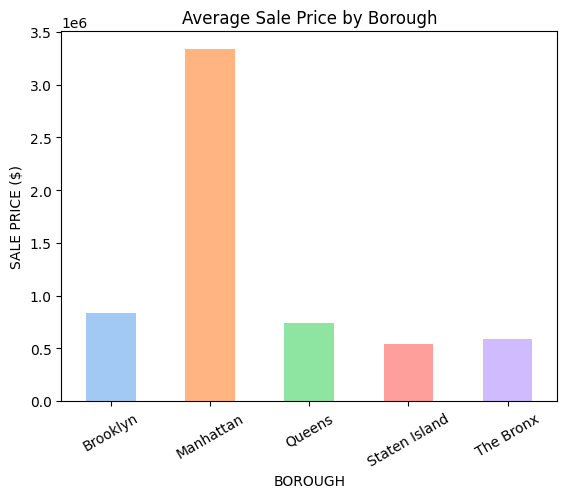

In [73]:
# Rank schools by their SAT scores
sorted_SAT = merged_data.sort_values('sat_score', ascending=False)
print(sorted_SAT)

# Visualize the mean sale price by borough
properties_grouped.plot.bar(x='BOROUGH', y='SALE PRICE', rot=30, legend=False, color=sns.color_palette("pastel"))
plt.ylabel('SALE PRICE ($)')
plt.title('Average Sale Price by Borough')
plt.show()

 **Average Property Prices by Borough:**
    - The bar chart visualizes the average property prices in each borough. Manhattan had the highest average property prices, followed by Brooklyn and Queens. The Bronx and Staten Island had lower average prices in comparison.
  

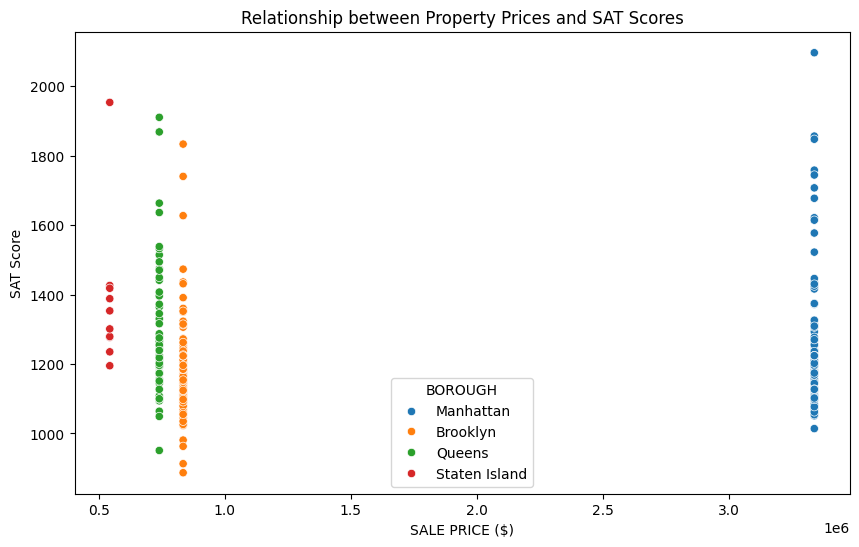

In [71]:
# To conclude, you can also analyze the relationship between SAT scores and property prices
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_data, x='SALE PRICE', y='sat_score', hue='BOROUGH')
plt.xlabel('SALE PRICE ($)')
plt.ylabel('SAT Score')
plt.title('Relationship between Property Prices and SAT Scores')
plt.show()

**Relationship between SAT Scores and Property Prices:**
    - The scatter plot shows the relationship between SAT scores and property prices across the boroughs. 
    - The analysis suggests that there is a varied relationship between property prices and SAT scores, depending on the borough.
    - In some boroughs, such as Manhattan, higher property prices are generally associated with higher SAT scores. However, in other boroughs like The Bronx, this relationship is less clear.


**Conclusion**
- **Neighborhoods with High SAT Scores:** Manhattan and Brooklyn generally have schools with higher SAT scores, but these areas also have higher property prices.
- **Cost-Effective Neighborhoods:** If you're looking for neighborhoods with relatively good schools but lower property prices, Queens and Staten Island might offer a better balance.
  
This analysis provides valuable insights for potential homebuyers and policymakers interested in the intersection of education quality and real estate in NYC.


In [75]:
# Calculate the correlations between survey responses
survey_columns = ['rr_s', 'rr_t', 'rr_p']  # Student, teacher, and parent response rates
survey_responses = merged_data[survey_columns]
survey_correlations = survey_responses.corr()
survey_correlations

,rr_s,rr_t,rr_p
rr_s,1.000000,0.328477,0.428567
rr_t,0.328477,1.000000,0.344494
rr_p,0.428567,0.344494,1.000000


### Correlations Between Parent, Teacher, and Student Survey Responses

We analyzed the survey response rates of students, teachers, and parents to understand how these groups' feedback is correlated.

**Results:**
- The correlation matrix shows how strongly student, teacher, and parent responses are related to each other. For example, if students have a high response rate, we can see if this correlates with high response rates from teachers and parents as well.

In [77]:
# Calculate school scores based on SAT scores, safety perception, and academic standards
merged_data['school_score'] = merged_data['sat_score'] * 0.5 + merged_data['saf_s_11'] * 0.3 + merged_data['aca_s_11'] * 0.2
school_rankings =merged_data[['SCHOOL NAME', 'school_score']].sort_values(by='school_score', ascending=False)
school_rankings.head(10)

,SCHOOL NAME,school_score
37,STUYVESANT HIGH SCHOOL,1051.83
269,STATEN ISLAND TECHNICAL HIGH SCHOOL,980.66
215,TOWNSEND HARRIS HIGH SCHOOL,958.96
240,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,937.74
5,BARD HIGH SCHOOL EARLY COLLEGE,932.27
79,"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...",927.48
94,BROOKLYN TECHNICAL HIGH SCHOOL,920.12
26,ELEANOR ROOSEVELT HIGH SCHOOL,883.07
60,BEACON HIGH SCHOOL,875.98
105,"BROOKLYN LATIN SCHOOL, THE",873.89


### Assigning Scores to Schools

In this analysis, we assigned scores to schools based on a combination of SAT scores, safety perceptions, and academic standards. Each factor was weighted to reflect its importance in the overall score.

**Results:**
- The `school_score` provides an overall measure of school quality, incorporating multiple aspects of school performance. This ranking helps to compare and evaluate schools based on a comprehensive set of criteria.

# **General Conclusions**

This project examined the relationship between SAT scores in New York City schools and various demographic, social, and economic factors. It also analyzed the connections between property sale prices and school performance. The study’s findings highlight the following key points:

### 1. **School Resources and Student Achievement**:
SAT scores showed a positive correlation with school characteristics such as student population, teacher numbers, and resources. Larger schools with more resources tend to have higher SAT scores, indicating that the quality of education has a significant impact on students' academic success.

### 2. **Perception of Safety and Academic Achievement**:
Both students' and teachers' perceptions of safety were positively correlated with SAT scores. A safe school environment was observed to have a positive effect on students’ academic performance, suggesting that improving safety in schools can contribute to higher success rates.

### 3. **Demographic Differences and Academic Performance**:
Schools with a higher concentration of White and Asian students generally had higher SAT scores, whereas schools with a higher proportion of Black and Hispanic students tended to have lower SAT scores. This finding indicates that racial and socio-economic inequalities are reflected in academic performance and highlights the need for further investigation.

### 4. **Property Prices and School Performance**:
Borough-level analyses revealed that higher property prices, especially in areas such as Manhattan and Brooklyn, are associated with higher SAT scores. This finding underscores the influence of socio-economic conditions on education quality, with wealthier areas tending to have better-performing schools.

### 5. **Overall School Rating System**:
When a comprehensive scoring system was applied to schools based on SAT scores, safety perceptions, and academic standards, schools with high scores excelled in both academic achievement and safety. Such a rating system offers a broader perspective on evaluating the quality of education.

# **Conclusion**:
This analysis shows that improving safety, access to resources, and academic standards is crucial for enhancing academic success in schools. Moreover, the relationship between property prices and demographic factors highlights the need to address socio-economic inequalities in education. Educational policies should focus on the equitable distribution of resources and removing socio-economic barriers to ensure all students have an equal opportunity to succeed.
